<a href="https://colab.research.google.com/github/marcopedrinazzi/experiments/blob/main/examples/vision/ipynb/mnist_convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple MNIST convnet

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2015/06/19<br>
**Last modified:** 2020/04/21<br>
**Description:** A simple convnet that achieves ~99% test accuracy on MNIST.

## Setup

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

## Prepare the data

In [2]:
# Model / data parameters
num_classes = 10 #da 0 a 9
input_shape = (28, 28, 1) #(Width, Height, Channels) 1 per grigio 3 per RGB

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
#So the x_train data is the "features." In this case, the features are pixel 
#values of the 28x28 images of these digits 0-9. 
#The y_train is the label (is it a 0,1,2,3,4,5,6,7,8 or a 9?)
#The testing variants of these variables is the "out of sample" examples that 
#we will use. These are examples from our data that we're going to set aside, 
#reserving them for testing the model.

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"), #num_classes è il
        #
    ]
)

#A sequential model is what you're going to use most of the time. It just means 
#things are going to go in direct order. A feed forward model. 

#layers.Conv2D(32,....)
#Fa la convoluzione 32 è il numero di filtri
#L'output sarà dopo la prima convoluzione di 26x26 (muovo il kernel 3x3 per 
#tutta l'immagine)

#layers.MaxPooling2D(pool_size=(2, 2)),
#Fa il Max pooling e l'ouput della immagine sarà 13x13 perchè setto nella 
#immagine da 26x26 in pool da 2x2

#For this you need to understand what filters actually do.

#Nella nuova convoluzione aumento i filtri perchè:
#Every layer of filters is there to capture patterns. For example, the first 
#layer of filters captures patterns like edges, corners, dots etc. Subsequent 
#layers combine those patterns to make bigger patterns 
#(like combining edges to make squares, circles, etc.).
#Now as we move forward in the layers, the patterns get more complex; 
#hence there are larger combinations of patterns to capture. 
#That's why we increase the filter size in subsequent layers to capture as many 
#combinations as possible.

# layers.Flatten(),
# Fa il flattening

# layers.Dropout(0.5),
#Applies Dropout to the input.
#The Dropout layer randomly sets input units to 0 with a frequency of rate 
#at each step during training time, which helps prevent overfitting. 
#Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all 
#inputs is unchanged.

#layers.Dense(num_classes, activation="softmax"),
#E' il layer fully connected che serve per la classificazione finale

#https://towardsdatascience.com/convolution-neural-network-for-image-processing-using-keras-dc3429056306

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

## Train the model

In [4]:
#FACCIO IL TRAINING FACCIO UNA SEPARAZIONE ULTERIORE NEI TRAINING DATA UTILIZZANDO PARTE DEI TRAINING DATA COME VALIDATION DATA (PARAMETRO VALIDATION_SPLIT)
#validation_split says: "hey give me all the input data – I will take care of splitting between test and validation".
#validation_data says "please give me explicitly the validation data"
#https://stackoverflow.com/questions/45117295/what-is-the-relation-between-validation-data-and-validation-split-in-keras-fit



batch_size = 128
#The batch size defines the number of samples that will be propagated through the network.
#https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network
#QUI LO SPIEGA BENE
epochs = 15

#Now we need to "compile" the model. This is where we pass the settings for 
#actually optimizing/training the model we've defined.

#Next, we have our loss metric. Loss is a calculation of error. 
#A neural network doesn't actually attempt to maximize accuracy. 
#It attempts to minimize loss. Again, there are many choices, but some form of 
#categorical crossentropy is a good start for a classification task like this.

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

#As we train, we can see loss goes down (yay), and accuracy improves quite quickly to 98-99% (double yay!)

#batch_size: Integer or None. Number of samples per gradient update. If unspecified, batch_size will default to 32. 
#Do not specify the batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

#validation_split: Float between 0 and 1. Fraction of the training data to be used as validation data. 
#The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. 
#The validation data is selected from the last samples in the x and y data provided, before shuffling. 
#This argument is not supported when x is a dataset, generator or keras.utils.Sequence instance. validation_split is not yet supported with

Epoch 1/15
422/422 [==============================] - 46s 108ms/step - loss: 0.3732 - accuracy: 0.8887 - val_loss: 0.0830 - val_accuracy: 0.9792
Epoch 2/15
422/422 [==============================] - 41s 98ms/step - loss: 0.1167 - accuracy: 0.9646 - val_loss: 0.0608 - val_accuracy: 0.9850
Epoch 3/15
422/422 [==============================] - 41s 97ms/step - loss: 0.0891 - accuracy: 0.9723 - val_loss: 0.0507 - val_accuracy: 0.9883
Epoch 4/15
422/422 [==============================] - 41s 97ms/step - loss: 0.0736 - accuracy: 0.9774 - val_loss: 0.0418 - val_accuracy: 0.9885
Epoch 5/15
422/422 [==============================] - 41s 97ms/step - loss: 0.0649 - accuracy: 0.9805 - val_loss: 0.0404 - val_accuracy: 0.9887
Epoch 6/15
422/422 [==============================] - 40s 96ms/step - loss: 0.0589 - accuracy: 0.9815 - val_loss: 0.0408 - val_accuracy: 0.9893
Epoch 7/15
422/422 [==============================] - 40s 96ms/step - loss: 0.0539 - accuracy: 0.9833 - val_loss: 0.0374 - val_accuracy

## Evaluate the trained model

In [5]:
#FACCIO TEST SUI VALORI DEL DATASET CHE NON SONO MAI STATI USATI IN ALLENAMENTO

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

#Now that's loss and accuracy for in-sample data. Getting a high accuracy and 
#low loss might mean your model learned how to classify digits in general (it generalized)...or it simply memorized every single example you showed it (it overfit). 
#This is why we need to test on out-of-sample data (data we didn't use to train the model).

Test loss: 0.024355581030249596
Test accuracy: 0.991599977016449


## Save model and load it back (in the next section)


In [6]:
model.save('cnn1.model')

INFO:tensorflow:Assets written to: cnn1.model/assets


## Make predictions


Ho previsto questo numero 2
Il numero inserito era questo


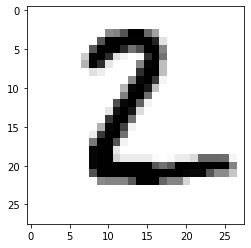

In [20]:
new_model = keras.models.load_model('cnn1.model')
predictions = new_model.predict(x_test)

print("Ho previsto questo numero",np.argmax(predictions[1]))

print("Il numero inserito era questo")

input_di_test = np.squeeze(x_test[1]) #Remove axes of length one from a. Cosi posso fare il grafico
plt.imshow(input_di_test,cmap=plt.cm.binary)
plt.show()



